# Dự đoán các căn bệnh dựa trên dữ liệu thời tiết và khí hậu

Notebook này hướng dẫn quy trình dự đoán các căn bệnh có thể xảy ra dựa trên dữ liệu thời tiết và sức khỏe từ file `global_climate_health_impact_tracker_2015_2025.csv`.

### 🎯 Mục tiêu dự đoán của dự án

* Dự đoán **tỷ lệ bệnh hô hấp (respiratory_disease_rate)** từ pm25 và air_quality_index.
* Dự đoán **chỉ số rủi ro bệnh truyền qua vector (vector_disease_risk_score)** từ temperature_celsius, precipitation_mm và heat_related_admissions.
* Dự đoán **số ca nhập viện do nắng nóng (heat_related_admissions)** từ temperature_celsius, precipitation_mm, heat_wave_days và extreme_weather_events.

## 1. Import thư viện cần thiết và tải dữ liệu

- Sử dụng pandas, numpy, matplotlib, seaborn, scikit-learn.
- Đọc file `global_climate_health_impact_tracker_2015_2025.csv` vào DataFrame.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TRAIN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('data/global_climate_health_impact_tracker_2015_2025.csv')

print('Health rows,cols:', df.shape)
df.head()
df.columns

Health rows,cols: (14100, 30)


Index(['record_id', 'country_code', 'country_name', 'region', 'income_level',
       'date', 'year', 'month', 'week', 'latitude', 'longitude',
       'population_millions', 'temperature_celsius', 'temp_anomaly_celsius',
       'precipitation_mm', 'heat_wave_days', 'drought_indicator',
       'flood_indicator', 'extreme_weather_events', 'pm25_ugm3',
       'air_quality_index', 'respiratory_disease_rate',
       'cardio_mortality_rate', 'vector_disease_risk_score',
       'waterborne_disease_incidents', 'heat_related_admissions',
       'healthcare_access_index', 'gdp_per_capita_usd', 'mental_health_index',
       'food_security_index'],
      dtype='object')

## Heatmap

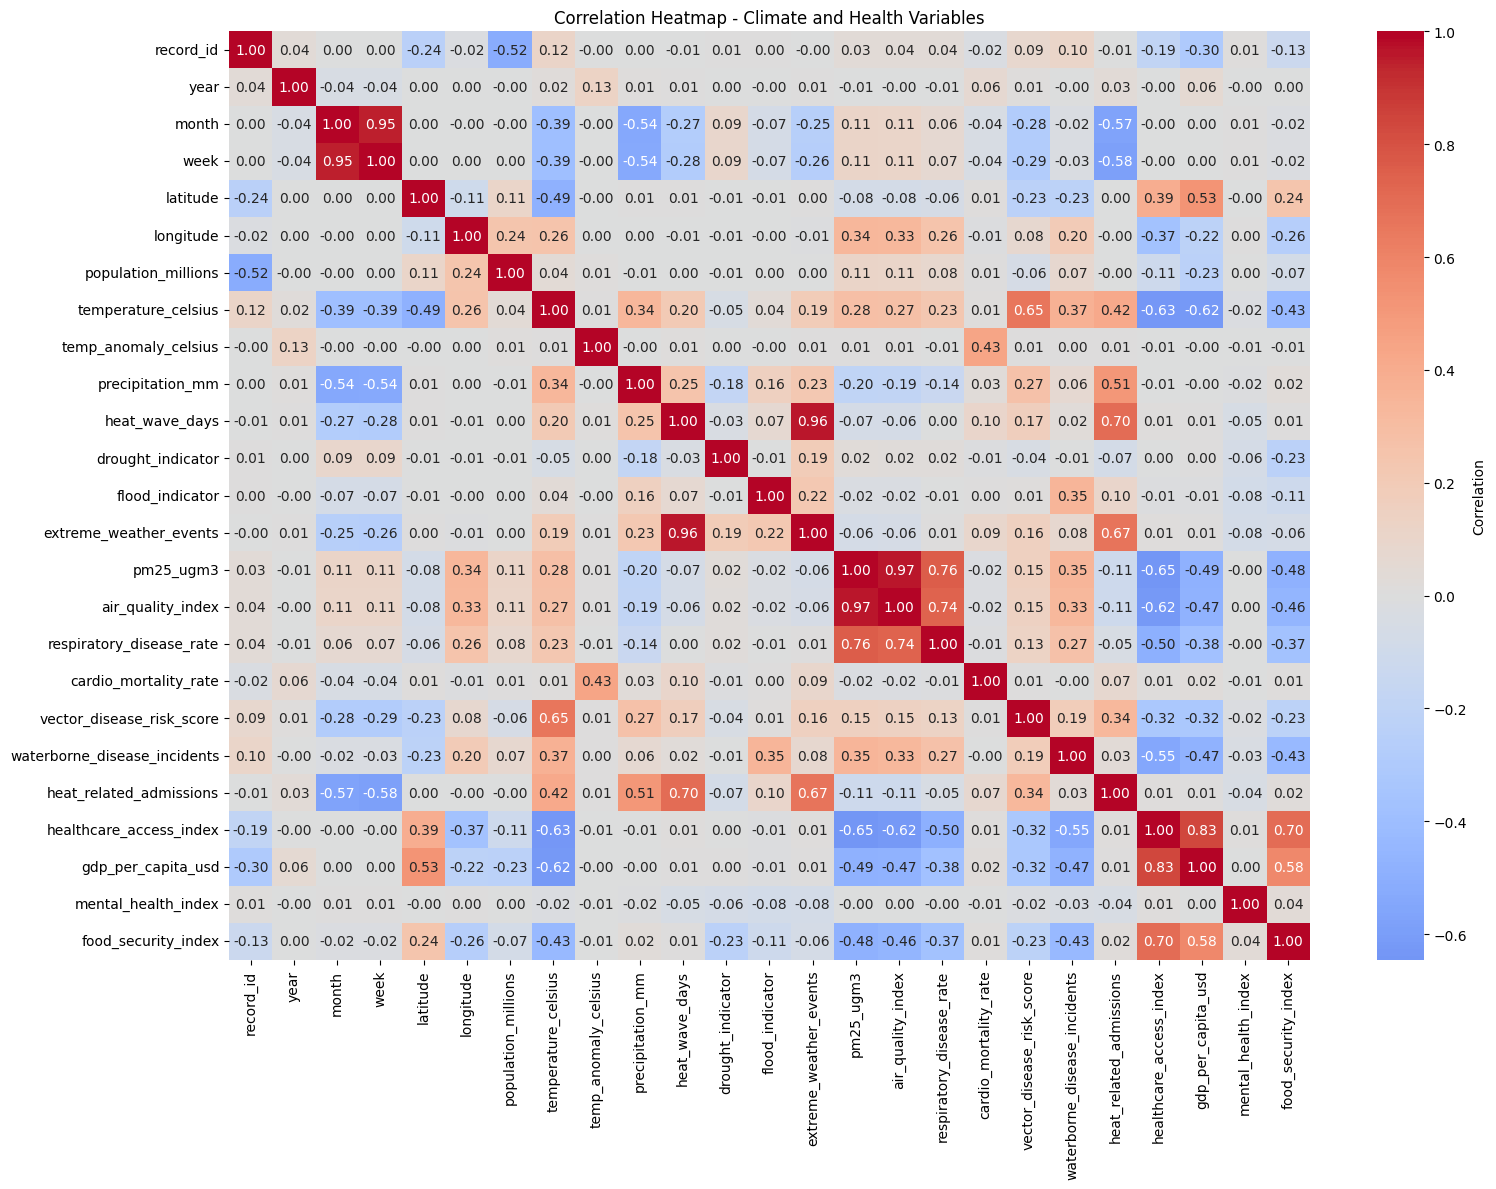

In [20]:
import seaborn as sns

# Select only numeric columns for heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap - Climate and Health Variables')
plt.tight_layout()
plt.show()

Ta sẽ huấn luyện mô hình về các vấn đề sức dựa trên các biến có hệ số tương quan mạnh:
```
respiratory_disease_rate: pm25, air_qulity_index
vector_disease_risk_score: temperature_celsius, precipitation_mm, heat_ralated_adminssions
heat_related_admissions: temperature_celsius, precipitation_mm, heat_wave_days, extreme_weahter_events
```

124.43407412462824 0.4731846820713371
98.27108957067846 0.5839506529094147


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11008\4182802223.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11008\4182802223.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


Text(0.5, 0, '[Linear] Actual Respiratory Disease Rate')

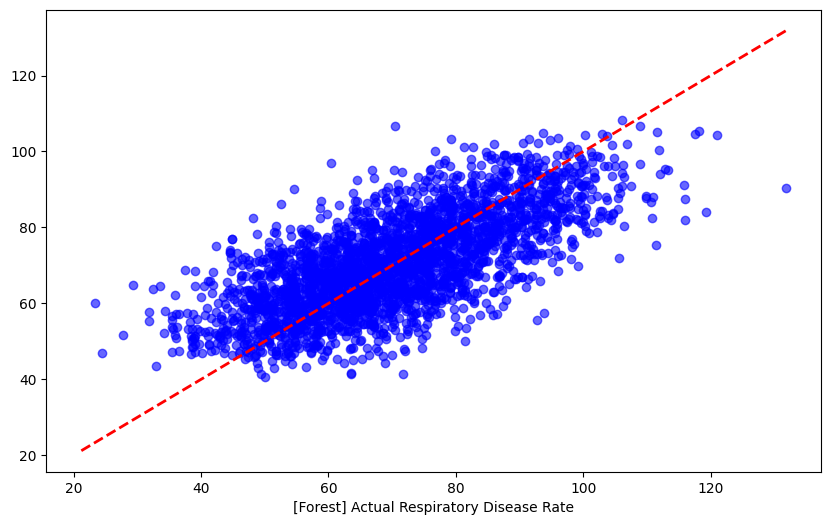

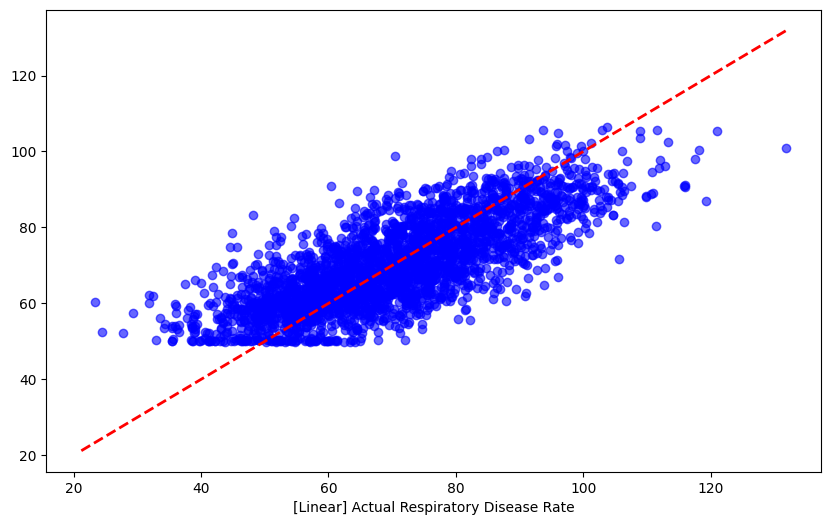

In [21]:
# Model 1: respiratory_disease_rate
features = ['pm25_ugm3', 'air_quality_index']
target = 'respiratory_disease_rate'

X = numeric_df[features].dropna()
y = numeric_df[target].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest Regressor
forestmodel_respiratory_disease_rate = RandomForestRegressor(n_estimators=100, random_state=42)
forestmodel_respiratory_disease_rate.fit(X_train, y_train)
y_pred = forestmodel_respiratory_disease_rate.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('[Forest] Actual Respiratory Disease Rate')

# Linear Regression
linmodel_respiratory_disease_rate = LinearRegression()
linmodel_respiratory_disease_rate.fit(X_train, y_train)
y_pred = linmodel_respiratory_disease_rate.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

# => Linear Regression gives better result

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('[Linear] Actual Respiratory Disease Rate')

26.728699387464673 0.9085955048517242
167.66238722177977 0.4266426646053446


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11008\829019743.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11008\829019743.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


Text(0.5, 0, '[Forest] Actual Vector Disease Risk Score')

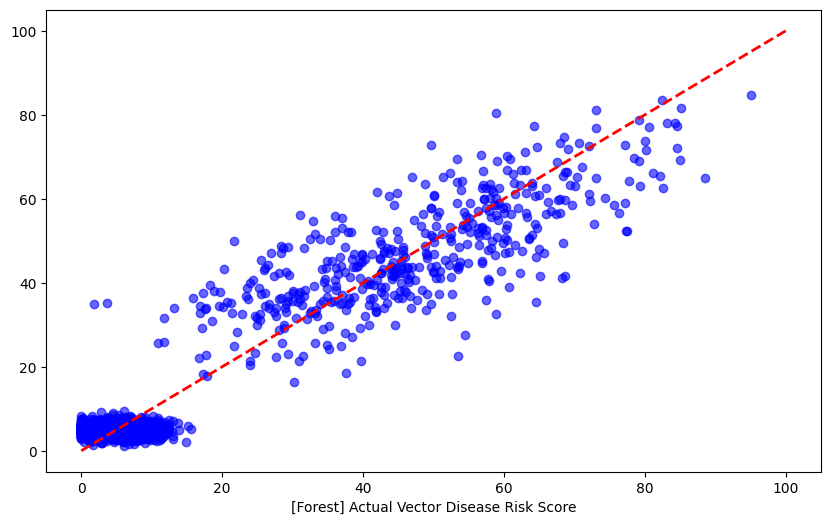

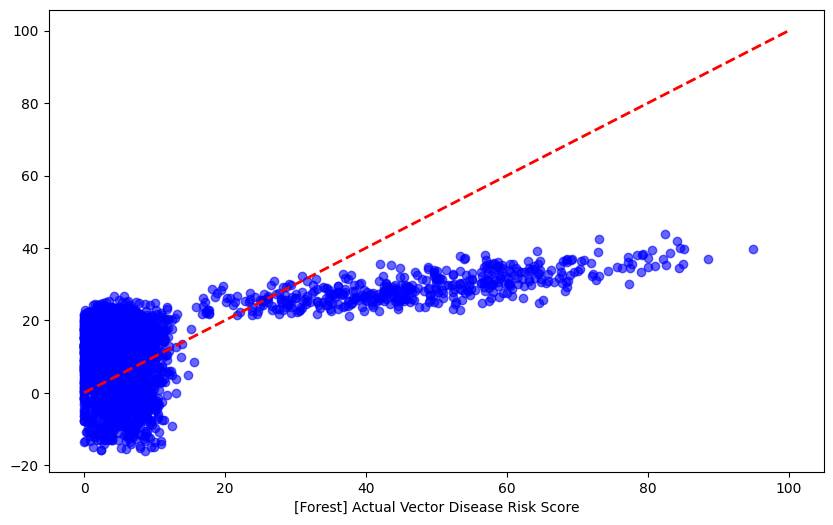

In [22]:
# Model 2: vector_disease_risk_score
features = ['temperature_celsius', 'precipitation_mm', 'heat_related_admissions']
target = 'vector_disease_risk_score'

X = numeric_df[features].dropna()
y = numeric_df[target].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest Regressor
forestmodel_vector_disease_risk_score = RandomForestRegressor(n_estimators=100, random_state=42)
forestmodel_vector_disease_risk_score.fit(X_train, y_train)

y_pred = forestmodel_vector_disease_risk_score.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('[Forest] Actual Vector Disease Risk Score')

# Linear Regression
linmodel_vector_disease_risk_score = LinearRegression()
linmodel_vector_disease_risk_score.fit(X_train, y_train)
y_pred = linmodel_vector_disease_risk_score.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

# => Random Forest works better

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('[Forest] Actual Vector Disease Risk Score')

33.804759416352844 0.6032112770481663
31.2797548416442 0.6328489185502538


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11008\4292638018.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11008\4292638018.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


Text(0.5, 0, '[Linear] Actual Heat Related Admissions')

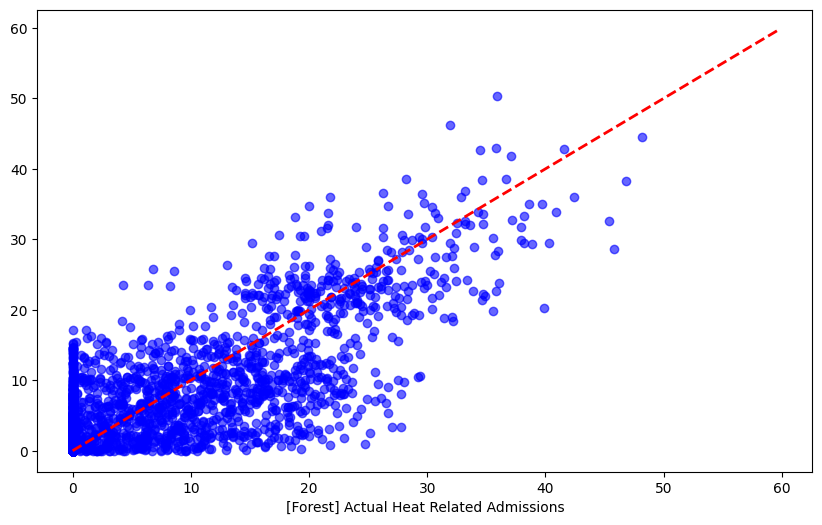

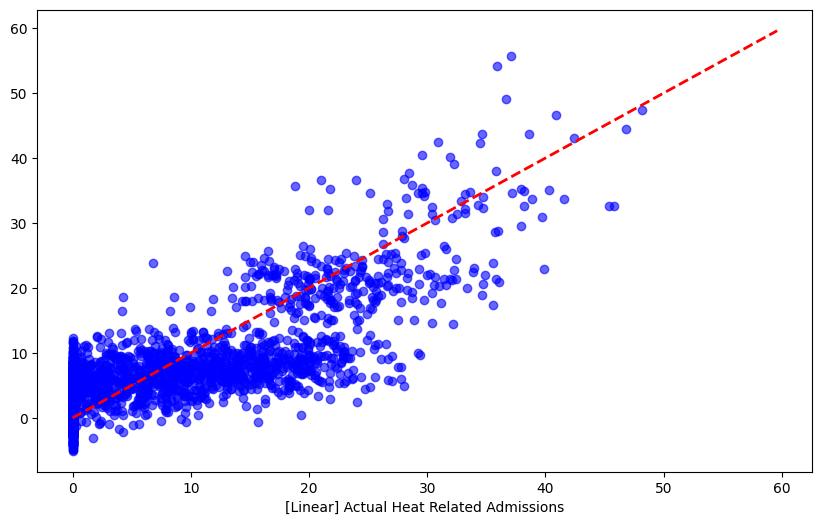

In [23]:
# Model 3: heat_related_admissions
features = ['temperature_celsius', 'precipitation_mm', 'heat_wave_days', 'extreme_weather_events']
target = 'heat_related_admissions'

X = numeric_df[features].dropna()
y = numeric_df[target].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest Regressor
forestmodel_heat_related_admissions = RandomForestRegressor(n_estimators=100, random_state=42)
forestmodel_heat_related_admissions.fit(X_train, y_train)

y_pred = forestmodel_heat_related_admissions.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('[Forest] Actual Heat Related Admissions')

# Linear Regression
linmodel_heat_related_admissions = LinearRegression()
linmodel_heat_related_admissions.fit(X_train, y_train)
y_pred = linmodel_heat_related_admissions.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

# => Linear Regression gives better results in all 3 cases

# Vẽ biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('[Linear] Actual Heat Related Admissions')